In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400

/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400


In [ ]:
import os
import pandas as pd

# ฟังก์ชั่นสำหรับแปลงข้อมูล CSV เป็น YOLO OBB format ยังไม่ normalization
def csv_to_yolo_obb_format(csv_file, output_file):
    # อ่านไฟล์ CSV
    df = pd.read_csv(csv_file, header=None)  # ถ้าไม่มี header, ใส่ header=None

    with open(output_file, 'w') as f:
        # ลูปผ่านแต่ละ row ในไฟล์ CSV

        for index, row in df.iterrows():
            if (index % 2) == 0:
                # เก็บแถวแรกไว้ใน collect
                collect = row
            else:
                # เมื่อเจอแถวที่สอง ให้รวมกับข้อมูลใน collect แล้วเขียนข้อมูลลงในไฟล์
                # สมมุติว่า CSV มี column: x1, y1, x2, y2, x3, y3, x4, y4, label

                # แยกข้อมูลจากแถวก่อนหน้า (collect)
                x1, y1, x2, y2, label1 = collect
                # แยกข้อมูลจากแถวปัจจุบัน
                x3, y3, x4, y4, label2 = row

                # สมมติว่าทั้งสองแถวมี label เดียวกัน (label1 == label2)
                # YOLO OBB format: label x1 y1 x2 y2 x3 y3 x4 y4
                line = f"{int(label1)} {x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}\n"
                f.write(line)

# ฟังก์ชั่นสำหรับวนลูปแปลงไฟล์ CSV ทั้งหมดในโฟลเดอร์
def convert_folder_to_yolo_obb(input_folder, output_folder):
    # สร้างโฟลเดอร์สำหรับไฟล์ OBB หากยังไม่มี
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # ลูปผ่านไฟล์ทั้งหมดในโฟลเดอร์ input
    for filename in os.listdir(input_folder):
        if filename.endswith('.csv'):
            input_file = os.path.join(input_folder, filename)
            print(filename)
            output_file = os.path.join(output_folder, filename.replace('.csv', '.txt'))

            # แปลงไฟล์ CSV เป็น YOLO OBB format
            csv_to_yolo_obb_format(input_file, output_file)
            print(f"Converted {input_file} to {output_file}")

# ตั้งค่า path โฟลเดอร์ input และ output
input_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'
output_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'

# เรียกใช้ฟังก์ชั่นแปลงไฟล์
convert_folder_to_yolo_obb(input_folder, output_folder)


0107-F-033Y0.csv
Converted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0107-F-033Y0.csv to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0107-F-033Y0.txt
0024-F-014Y0.csv
Converted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0024-F-014Y0.csv to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0024-F-014Y0.txt
0031-F-014Y0.csv
Converted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0031-F-014Y0.csv to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0031-F-014Y0.txt
0101-F-022Y0.csv
Converted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0101-F-022Y0.csv to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0101-F-022Y0.txt
0102-F-013Y0.csv
Converted /cont

In [ ]:
import os

# ฟังก์ชั่นสำหรับลบไฟล์ CSV ทั้งหมดในโฟลเดอร์
def delete_csv_files(folder_path):
    # ลูปผ่านไฟล์ทั้งหมดในโฟลเดอร์
    for filename in os.listdir(folder_path):
        # ตรวจสอบว่าไฟล์เป็นไฟล์ .csv หรือไม่
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            try:
                # ลบไฟล์
                os.remove(file_path)
                print(f"Deleted {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# ตั้งค่า path ของโฟลเดอร์
folder_path = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'

# เรียกใช้ฟังก์ชั่นลบไฟล์ CSV
delete_csv_files(folder_path)


Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0107-F-033Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0024-F-014Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0031-F-014Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0101-F-022Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0102-F-013Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0104-F-013Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0105-F-009Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0106-F-016Y0.csv
Deleted /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPIN

In [ ]:
#แบ่ง train test vali
import os
import shutil
import random

def split_dataset(input_folder, output_folder, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, image_exts=('.jpg', '.jpeg', '.png')):
    """
    แบ่งชุดข้อมูลเป็น train, validation, และ test โดยรักษาชุดไฟล์ภาพและ label ให้อยู่ในชุดเดียวกัน

    Parameters:
    - input_folder: โฟลเดอร์ที่มีไฟล์ภาพและไฟล์ label
    - output_folder: โฟลเดอร์ที่จะเก็บชุดข้อมูลที่แบ่งออกมา
    - train_ratio: สัดส่วนของชุด train
    - val_ratio: สัดส่วนของชุด validation
    - test_ratio: สัดส่วนของชุด test
    - image_exts: นามสกุลของไฟล์ภาพที่ต้องการพิจารณา
    """
    # ตรวจสอบสัดส่วนรวมกันต้องเท่ากับ 1
    if not abs((train_ratio + val_ratio + test_ratio) - 1.0) < 1e-6:
        raise ValueError("train_ratio, val_ratio, และ test_ratio ต้องรวมกันเท่ากับ 1")

    # สร้างโฟลเดอร์หลักถ้ายังไม่มี
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # สร้างโฟลเดอร์ย่อยสำหรับ train, val, test
    splits = ['train', 'val', 'test']
    split_folders = {split: os.path.join(output_folder, split) for split in splits}
    for split in splits:
        if not os.path.exists(split_folders[split]):
            os.makedirs(split_folders[split])

    # ดึงฐานชื่อไฟล์ภาพทั้งหมดที่มี label (.txt)
    all_files = os.listdir(input_folder)
    image_files = [f for f in all_files if f.lower().endswith(image_exts)]

    # ตรวจสอบว่ามีไฟล์ label สำหรับทุกไฟล์ภาพ
    image_base_names = []
    for img in image_files:
        base_name = os.path.splitext(img)[0]
        label_file = base_name + '.txt'
        if label_file in all_files:
            image_base_names.append(base_name)
        else:
            print(f"Warning: ไม่มีไฟล์ label สำหรับ {img}, ข้ามไฟล์นี้")

    # สุ่มเรียงลำดับฐานชื่อไฟล์
    random.shuffle(image_base_names)

    total = len(image_base_names)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_bases = image_base_names[:train_end]
    val_bases = image_base_names[train_end:val_end]
    test_bases = image_base_names[val_end:]

    # ฟังก์ชั่นสำหรับคัดลอกไฟล์ไปยังโฟลเดอร์เป้าหมาย
    def copy_files(bases, target_folder):
        for base in bases:
            for ext in image_exts:
                img_file = base + ext
                label_file = base + '.txt'
                img_src = os.path.join(input_folder, img_file)
                label_src = os.path.join(input_folder, label_file)
                if os.path.exists(img_src) and os.path.exists(label_src):
                    shutil.copy(img_src, target_folder)
                    shutil.copy(label_src, target_folder)
                else:
                    print(f"Warning: ขาดไฟล์ {img_file} หรือ {label_file}, ข้ามการคัดลอก")

    # คัดลอกไฟล์ไปยังแต่ละโฟลเดอร์
    copy_files(train_bases, split_folders['train'])
    copy_files(val_bases, split_folders['val'])
    copy_files(test_bases, split_folders['test'])

    # แสดงผลสรุป
    print(f"Total images with labels: {total}")
    print(f"Train: {len(train_bases)} images")
    print(f"Validation: {len(val_bases)} images")
    print(f"Test: {len(test_bases)} images")

# กำหนด path ของ input folder และ output folder
input_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'       # โฟลเดอร์ที่มีไฟล์ .jpg และ .txt
output_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP'     # โฟลเดอร์ที่จะเก็บชุด train, val, test

# เรียกใช้ฟังก์ชั่นเพื่อแบ่งชุดข้อมูล
split_dataset(input_folder, output_folder, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1)


Total images with labels: 400
Train: 320 images
Validation: 40 images
Test: 40 images


In [ ]:
#แบ่งข้อมูลให้ไปอยู่ใน floder
import os
import shutil

def separate_images_and_labels(input_folder):
    # สร้างโฟลเดอร์สำหรับเก็บภาพและ label
    images_folder = os.path.join(input_folder, 'images')
    labels_folder = os.path.join(input_folder, 'labels')

    os.makedirs(images_folder, exist_ok=True)  # สร้างโฟลเดอร์ images ถ้ายังไม่มี
    os.makedirs(labels_folder, exist_ok=True)  # สร้างโฟลเดอร์ labels ถ้ายังไม่มี

    # ลูปผ่านไฟล์ทั้งหมดใน input_folder
    for file in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file)

        # ตรวจสอบว่าเป็นไฟล์หรือไม่
        if os.path.isfile(file_path):
            # แยกไฟล์ภาพและไฟล์ label
            if file.endswith(('.jpg', '.png', '.jpeg')):  # แก้ไขนามสกุลตามต้องการ
                shutil.move(file_path, os.path.join(images_folder, file))  # ย้ายไปโฟลเดอร์ images
            elif file.endswith('.txt'):
                shutil.move(file_path, os.path.join(labels_folder, file))  # ย้ายไปโฟลเดอร์ labels

    print("Separation completed: Images and labels have been moved.")

# กำหนด path ของ input folder
input_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val'  # โฟลเดอร์ที่มีข้อมูลภาพและ label

# เรียกใช้ฟังก์ชั่นเพื่อแยกข้อมูล
separate_images_and_labels(input_folder)


Separation completed: Images and labels have been moved.


In [ ]:
#ลบไฟล์ใน floder
import shutil
import os

# Replace 'your_directory_path' with the actual path of the directory to be removed
directory_path = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val/labels'

# Check if the path exists and is a directory
if os.path.exists(directory_path) and os.path.isdir(directory_path):
    # Use shutil.rmtree() to remove the directory and its contents
    shutil.rmtree(directory_path)
    print(f"Directory '{directory_path}' and its contents have been removed successfully.")
else:
    print(f"The path '{directory_path}' does not exist or is not a directory.")

Directory '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val/labels' and its contents have been removed successfully.


In [ ]:
import os
from PIL import Image

# ฟังก์ชันสำหรับอ่านพิกัดจากไฟล์ .txt และ normalize ด้วยขนาดของรูปภาพ
def normalize_coordinates(txt_file, img_width, img_height):
    normalized_lines = []
    with open(txt_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = parts[0]
            coordinates = list(map(float, parts[1:]))

            # Normalize coordinates (x1, y1, x2, y2, x3, y3, x4, y4)
            for i in range(0, len(coordinates), 2):
                coordinates[i] = coordinates[i] / img_width  # Normalize x by width
                coordinates[i + 1] = coordinates[i + 1] / img_height  # Normalize y by height

            # Append normalized data
            normalized_lines.append(f"{class_id} " + " ".join(map(str, coordinates)))

    return normalized_lines

# โฟลเดอร์ที่เก็บไฟล์ annotations และรูปภาพ
annotations_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'
images_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'
normalized_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized'  # โฟลเดอร์สำหรับเก็บผลลัพธ์

# ตรวจสอบว่ามีโฟลเดอร์ normalized_annotations หรือไม่ ถ้าไม่มีให้สร้างขึ้นมา
if not os.path.exists(normalized_folder):
    os.makedirs(normalized_folder)

# Loop through all annotation files
for txt_file in os.listdir(annotations_folder):
    if txt_file.endswith('.txt'):
        # รูปภาพที่ตรงกับไฟล์ .txt
        img_file = txt_file.replace('.txt', '.jpg')  # หรือ .png ขึ้นอยู่กับชนิดของรูปภาพ

        # ตรวจสอบว่ามีรูปภาพที่ตรงกันหรือไม่
        img_path = os.path.join(images_folder, img_file)
        if os.path.exists(img_path):
            # อ่านขนาดของภาพ
            with Image.open(img_path) as img:
                img_width, img_height = img.size

            # Normalize พิกัดจากไฟล์ .txt
            txt_path = os.path.join(annotations_folder, txt_file)
            normalized_data = normalize_coordinates(txt_path, img_width, img_height)

            # เขียนผลลัพธ์กลับไปที่ไฟล์ในโฟลเดอร์ normalized_annotations
            normalized_txt_path = os.path.join(normalized_folder, txt_file)
            with open(normalized_txt_path, 'w') as normalized_file:
                normalized_file.write("\n".join(normalized_data))

            print(f"Normalized {txt_file} and saved to {normalized_txt_path}")
        else:
            print(f"Image for {txt_file} not found in {images_folder}")


Normalized 0107-F-033Y0.txt and saved to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized/0107-F-033Y0.txt
Normalized 0024-F-014Y0.txt and saved to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized/0024-F-014Y0.txt
Normalized 0031-F-014Y0.txt and saved to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized/0031-F-014Y0.txt
Normalized 0101-F-022Y0.txt and saved to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized/0101-F-022Y0.txt
Normalized 0102-F-013Y0.txt and saved to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized/0102-F-013Y0.txt
Normalized 0104-F-013Y0.txt and saved to /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized/0104-F-013Y0.txt
Normalized 0105-F-009Y0.txt 

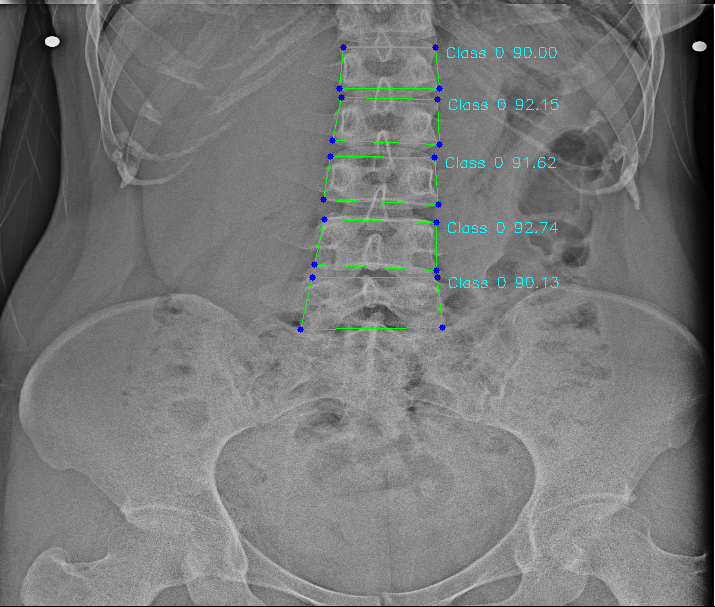

True

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # ใช้ cv2_imshow แทน
import math

# ฟังก์ชันสำหรับอ่านข้อมูลจากไฟล์ .txt
def read_bounding_box_data(txt_file):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()  # แยกข้อมูลด้วยช่องว่าง
            cls = int(data[0])  # class
            points = list(map(float, data[1:]))  # x1 y1 x2 y2 x3 y3 x4 y4
            boxes.append((cls, points))
    return boxes

# ฟังก์ชันสำหรับวาด bounding box ลงบนรูป
def plot_bounding_boxes(image, boxes, width, height):
    for box in boxes:
        cls, points = box
        # แปลงพิกัดของจุดทั้ง 4 เป็น tuple ของพิกัด (x, y)
        pts = np.array([
            [points[0]*width, points[1]*height],  # x1, y1
            [points[2]*width, points[3]*height],  # x2, y2
            [points[6]*width, points[7]*height],  # x3, y3
            [points[4]*width, points[5]*height]   # x4, y4
        ], np.int32)

        color = (0, 255, 0)  # สีของกรอบ (เขียว)
        thickness = 1  # ความหนาของเส้นกรอบ
        angles = Diagonal(pts)
        # วาด polygon หรือกรอบ bounding box
        cv2.polylines(image, [pts], isClosed=True, color=color, thickness=thickness)
        for point in pts:
            cv2.circle(image, tuple(point), radius=3, color=(255, 0, 0), thickness=-1)

        cv2.putText(image, f'Class {cls} {angles:.2f}', (pts[1][0]+10, pts[1][1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    return image

def Diagonal(box):
  #องศาจากเส้นทแยงมุมของด้านข้างกล่อง แล้วมาเฉลี่ยกัน 2 ข้าง
  vector1 = box[2] - box[0]  # เส้นทแยงมุมจากจุดที่ 1 ไปยังจุดที่ 3
  vector2 = box[3] - box[1]  # เส้นทแยงมุมจากจุดที่ 2 ไปยังจุดที่ 4

  # คำนวณมุมเฉลี่ยของทั้งสองเส้นทแยงมุม
  angle1 = math.degrees(math.atan2(vector1[1], vector1[0]))
  angle2 = math.degrees(math.atan2(vector2[1], vector2[0]))
  angle = (angle1 + angle2) / 2  # ค่าเฉลี่ยของมุมทั้งสอง

  # ให้มุมอยู่ในช่วง 0 ถึง 180 องศา
  angle = angle % 180
  return angle

# โหลดรูปภาพ
image_path = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/test/images/0001-F-037Y0.jpg'
image = cv2.imread(image_path)
width, height = image.shape[:2]
image = cv2.resize(image, (width//3, height//3))

# อ่านข้อมูล bounding box จากไฟล์ .txt
txt_file = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/test/labels/0001-F-037Y0.txt'
bounding_boxes = read_bounding_box_data(txt_file)

# วาดกรอบ bounding box ลงบนรูปภาพ
image_with_boxes = plot_bounding_boxes(image, bounding_boxes, width//3, height//3)

# แสดงรูปภาพที่มีกรอบ bounding box (ใช้ cv2_imshow สำหรับ Colab)
cv2_imshow(image_with_boxes)

# บันทึกรูปภาพที่ได้
cv2.imwrite('output_image.jpg', image_with_boxes)


## Find threshold train

In [206]:
import pandas as pd
excel_file = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/BUU-LSPINE_400_report.xlsx'
df = pd.read_excel(excel_file, sheet_name="diag_all_BUU-LSPINE_400")
df.drop(columns=['Column1', 'gender', 'age'], inplace=True)
filename_AP = df.iloc[:10, 0]
filename_AP

,filename
0,0014-F-062Y0
1,0021-F-079Y0
2,0159-M-062Y0
3,0220-F-069Y0
4,0223-F-063Y0
5,0238-F-067Y0
6,0250-F-069Y0
7,0277-F-050Y0
8,0316-F-074Y0
9,0430-M-060Y0


In [198]:
import random
file_without_sampling = []
file_without_test = []

for img_file in os.listdir('/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'):
    if img_file.endswith('.jpg') and (os.path.splitext(img_file)[0] not in filename_AP.values):
        file_without_sampling.append(img_file)
        file_without_test.append(img_file)

file_without_train = random.sample(file_without_sampling, 312)

for i in file_without_train:
  file_without_test.remove(i)

print(len(file_without_train), len(file_without_test))

312 78


In [220]:
file_train = ['0159-M-062Y0.jpg', '0021-F-079Y0.jpg', '0250-F-069Y0.jpg', '0220-F-069Y0.jpg', '0277-F-050Y0.jpg', '0430-M-060Y0.jpg']
file_test = ['0014-F-062Y0.jpg', '0223-F-063Y0.jpg', '0238-F-067Y0.jpg', '0316-F-074Y0.jpg']

In [200]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # ใช้ cv2_imshow แทน
import math

# ฟังก์ชันสำหรับอ่านข้อมูลจากไฟล์ .txt
def read_bounding_box_data(txt_file):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()  # แยกข้อมูลด้วยช่องว่าง
            points = list(map(float, data[1:]))  # x1 y1 x2 y2 x3 y3 x4 y4
            boxes.append(points)
    return boxes

# ฟังก์ชันสำหรับวาด bounding box ลงบนรูป
def plot_bounding_boxes(image, boxes, width, height):
    angles = []
    left_point = []
    right_point = []
    for box in boxes:
        points = box
        # แปลงพิกัดของจุดทั้ง 4 เป็น tuple ของพิกัด (x, y)
        pts = np.array([
            [points[0]*width, points[1]*height],  # x1, y1
            [points[2]*width, points[3]*height],  # x2, y2
            [points[6]*width, points[7]*height],  # x3, y3
            [points[4]*width, points[5]*height]   # x4, y4
        ], np.int32)

        color = (0, 255, 0)  # สีของกรอบ (เขียว)
        thickness = 1  # ความหนาของเส้นกรอบ
        angle = Diagonal(pts)
        angles.append(angle)

        # หาจุดที่ชิดซ้ายสุด (ค่าของ x น้อยสุด)
        left_point.append(pts[np.argmin(pts[:, 0])])

        # หาจุดที่ชิดขวาสุด (ค่าของ x มากสุด)
        right_point.append(pts[np.argmax(pts[:, 0])])

        # วาด polygon หรือกรอบ bounding box
        cv2.polylines(image, [pts], isClosed=True, color=color, thickness=thickness)
        for point in pts:
            cv2.circle(image, tuple(point), radius=3, color=(255, 0, 0), thickness=-1)

        cv2.putText(image, f'Angle {angle:.2f}', (pts[1][0]+10, pts[1][1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    left_point = np.array(left_point)
    right_point = np.array(right_point)
    leftmost_point = left_point[np.argmin(left_point[:, 0])]
    rightmost_point = right_point[np.argmax(right_point[:, 0])]

    cv2.circle(image, tuple(leftmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {leftmost_point[0]}', (leftmost_point[0]-85, leftmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
    cv2.circle(image, tuple(rightmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {width - rightmost_point[0]}', (rightmost_point[0]+20, rightmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    return image, max(angles), min(angles), (max(angles) - min(angles)), leftmost_point[0], width - rightmost_point[0]

def Diagonal(box):
  #องศาจากเส้นทแยงมุมของด้านข้างกล่อง แล้วมาเฉลี่ยกัน 2 ข้าง
  vector1 = box[2] - box[0]  # เส้นทแยงมุมจากจุดที่ 1 ไปยังจุดที่ 3
  vector2 = box[3] - box[1]  # เส้นทแยงมุมจากจุดที่ 2 ไปยังจุดที่ 4

  # คำนวณมุมเฉลี่ยของทั้งสองเส้นทแยงมุม
  angle1 = math.degrees(math.atan2(vector1[1], vector1[0]))
  angle2 = math.degrees(math.atan2(vector2[1], vector2[0]))
  angle = (angle1 + angle2) / 2  # ค่าเฉลี่ยของมุมทั้งสอง

  # ให้มุมอยู่ในช่วง 0 ถึง 180 องศา
  angle = angle % 180
  return angle

annotations_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized'
image_floder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'
angles = {'max':[], 'min':[], 'diff': []}
leftRight = {'left':[], 'right':[]}
file_without = []

for img_file in file_without_train:
    img_path = image_floder+'/'+img_file
    # รูปภาพที่ตรงกับไฟล์ .txt
    txt_file = img_file.replace('.jpg', '.txt')  # หรือ .png ขึ้นอยู่กับชนิดของรูปภาพ
    if os.path.exists(img_path):
        image = cv2.imread(img_path)
        width, height = image.shape[:2]
        image = cv2.resize(image, (width, height))
        text_file = annotations_folder+'/'+txt_file
        bounding_boxes = read_bounding_box_data(text_file)
        image_with_boxes, mx, mn, df, l, r = plot_bounding_boxes(image, bounding_boxes, width, height)
        leftRight['left'].append(l)
        leftRight['right'].append(r)
        # cv2_imshow(image_with_boxes)
        angles['max'].append(mx)
        angles['min'].append(mn)
        angles['diff'].append(df)
    else:
        print(f"Image for {txt_file} nt found in {images_folder}")

In [201]:
import scipy.stats as stats
print('mean')
print(np.mean(angles['max']))
print(np.mean(angles['min']))
print(np.mean(angles['diff']))
print('std')
print(np.std(angles['max']))
print(np.std(angles['min']))
print(np.std(angles['diff']))
print('mode')
print(stats.mode(angles['max']))
print(stats.mode(angles['min']))
print(stats.mode(angles['diff']))
print('median')
print(np.median(angles['max']))
print(np.median(angles['min']))
print(np.median(angles['diff']))

mean
92.56068683778649
87.23962249342297
5.321064344363515
std
4.080227348910806
3.5951365330382323
5.06915088308593
mode
ModeResult(mode=83.36591617080818, count=1)
ModeResult(mode=64.04736813033036, count=1)
ModeResult(mode=0.43043259498710995, count=1)
median
91.5714327491185
87.96175871181643
3.7083066926696873


In [221]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # ใช้ cv2_imshow แทน
import math

# ฟังก์ชันสำหรับอ่านข้อมูลจากไฟล์ .txt
def read_bounding_box_data(txt_file):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()  # แยกข้อมูลด้วยช่องว่าง
            points = list(map(float, data[1:]))  # x1 y1 x2 y2 x3 y3 x4 y4
            boxes.append(points)
    return boxes

# ฟังก์ชันสำหรับวาด bounding box ลงบนรูป
def plot_bounding_boxes(image, boxes, width, height):
    left_point = []
    right_point = []
    angles = []
    for box in boxes:
        points = box

        # แปลงพิกัดของจุดทั้ง 4 เป็น tuple ของพิกัด (x, y)
        pts = np.array([
            [points[0]*width, points[1]*height],  # x1, y1
            [points[2]*width, points[3]*height],  # x2, y2
            [points[6]*width, points[7]*height],  # x3, y3
            [points[4]*width, points[5]*height]   # x4, y4
        ], np.int32)

        color = (0, 255, 0)  # สีของกรอบ (เขียว)
        thickness = 1  # ความหนาของเส้นกรอบ
        angle = Diagonal(pts)
        angles.append(angle)

        # หาจุดที่ชิดซ้ายสุด (ค่าของ x น้อยสุด)
        left_point.append(pts[np.argmin(pts[:, 0])])

        # หาจุดที่ชิดขวาสุด (ค่าของ x มากสุด)
        right_point.append(pts[np.argmax(pts[:, 0])])

        # วาด polygon หรือกรอบ bounding box
        cv2.polylines(image, [pts], isClosed=True, color=color, thickness=thickness)

        for point in pts:
            cv2.circle(image, tuple(point), radius=3, color=(255, 0, 0), thickness=-1)

        cv2.putText(image, f'Angle {angle:.2f}', (pts[1][0]+10, pts[1][1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    left_point = np.array(left_point)
    right_point = np.array(right_point)
    leftmost_point = left_point[np.argmin(left_point[:, 0])]
    rightmost_point = right_point[np.argmax(right_point[:, 0])]

    cv2.circle(image, tuple(leftmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {leftmost_point[0]}', (leftmost_point[0]-85, leftmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
    cv2.circle(image, tuple(rightmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {width - rightmost_point[0]}', (rightmost_point[0]+20, rightmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
    # print(leftmost_point[0], width - rightmost_point[0])
    return image, max(angles), min(angles), (max(angles) - min(angles)), leftmost_point[0], width - rightmost_point[0]

def Diagonal(box):
  #องศาจากเส้นทแยงมุมของด้านข้างกล่อง แล้วมาเฉลี่ยกัน 2 ข้าง
  vector1 = box[2] - box[0]  # เส้นทแยงมุมจากจุดที่ 1 ไปยังจุดที่ 3
  vector2 = box[3] - box[1]  # เส้นทแยงมุมจากจุดที่ 2 ไปยังจุดที่ 4

  # คำนวณมุมเฉลี่ยของทั้งสองเส้นทแยงมุม
  angle1 = math.degrees(math.atan2(vector1[1], vector1[0]))
  angle2 = math.degrees(math.atan2(vector2[1], vector2[0]))
  angle = (angle1 + angle2) / 2  # ค่าเฉลี่ยของมุมทั้งสอง

  # ให้มุมอยู่ในช่วง 0 ถึง 180 องศา
  angle = angle % 180
  return angle

angles = {'max':[], 'min':[], 'diff': []}
leftRight = {'left':[], 'right':[]}
for filename in file_train:
  txt_file = filename.replace('.jpg', '.txt')
  image_path = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/'+filename
  txt_file = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized/'+txt_file

  image = cv2.imread(image_path)
  width, height = image.shape[:2]
  image = cv2.resize(image, (width, height))
  bounding_boxes = read_bounding_box_data(txt_file)

  # วาดกรอบ bounding box ลงบนรูปภาพ
  image_with_boxes, mx, mn, df, l, r = plot_bounding_boxes(image, bounding_boxes, width, height)
  angles['max'].append(mx)
  angles['min'].append(mn)
  angles['diff'].append(df)
  leftRight['left'].append(l)
  leftRight['right'].append(r)
  # แสดงรูปภาพที่มีกรอบ bounding box (ใช้ cv2_imshow สำหรับ Colab)
  # cv2_imshow(image_with_boxes)
  # print('\n')

# [print(key, value) for key, value in angles.items()]

In [222]:
import scipy.stats as stats
print('mean')
print(np.mean(angles['max']))
print(np.mean(angles['min']))
print(np.mean(angles['diff']))
print('std')
print(np.std(angles['max']))
print(np.std(angles['min']))
print(np.std(angles['diff']))
print('mode')
print(stats.mode(angles['max']))
print(stats.mode(angles['min']))
print(stats.mode(angles['diff']))
print('median')
print(np.median(angles['max']))
print(np.median(angles['min']))
print(np.median(angles['diff']))


mean
93.23764810772894
75.15529116675678
18.082356940972165
std
6.763660637677112
9.976610871798474
5.360226564488418
mode
ModeResult(mode=80.01697330632791, count=1)
ModeResult(mode=54.00260369175294, count=1)
ModeResult(mode=8.35648777498865, count=1)
median
94.50580526129245
78.74712903814452
18.79154284465507


In [232]:
print(np.std([12.72, 10.42]))

1.1500000000000004


## Find threshold all

In [150]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # ใช้ cv2_imshow แทน
import math

# ฟังก์ชันสำหรับอ่านข้อมูลจากไฟล์ .txt
def read_bounding_box_data(txt_file):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()  # แยกข้อมูลด้วยช่องว่าง
            points = list(map(float, data[1:]))  # x1 y1 x2 y2 x3 y3 x4 y4
            boxes.append(points)
    return boxes

# ฟังก์ชันสำหรับวาด bounding box ลงบนรูป
def plot_bounding_boxes(image, boxes, width, height):
    angles = []
    left_point = []
    right_point = []
    for box in boxes:
        points = box
        # แปลงพิกัดของจุดทั้ง 4 เป็น tuple ของพิกัด (x, y)
        pts = np.array([
            [points[0]*width, points[1]*height],  # x1, y1
            [points[2]*width, points[3]*height],  # x2, y2
            [points[6]*width, points[7]*height],  # x3, y3
            [points[4]*width, points[5]*height]   # x4, y4
        ], np.int32)

        color = (0, 255, 0)  # สีของกรอบ (เขียว)
        thickness = 1  # ความหนาของเส้นกรอบ
        angle = Diagonal(pts)
        angles.append(angle)

        # หาจุดที่ชิดซ้ายสุด (ค่าของ x น้อยสุด)
        left_point.append(pts[np.argmin(pts[:, 0])])

        # หาจุดที่ชิดขวาสุด (ค่าของ x มากสุด)
        right_point.append(pts[np.argmax(pts[:, 0])])

        # วาด polygon หรือกรอบ bounding box
        cv2.polylines(image, [pts], isClosed=True, color=color, thickness=thickness)
        for point in pts:
            cv2.circle(image, tuple(point), radius=3, color=(255, 0, 0), thickness=-1)

        cv2.putText(image, f'Angle {angle:.2f}', (pts[1][0]+10, pts[1][1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    left_point = np.array(left_point)
    right_point = np.array(right_point)
    leftmost_point = left_point[np.argmin(left_point[:, 0])]
    rightmost_point = right_point[np.argmax(right_point[:, 0])]

    cv2.circle(image, tuple(leftmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {leftmost_point[0]}', (leftmost_point[0]-85, leftmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
    cv2.circle(image, tuple(rightmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {width - rightmost_point[0]}', (rightmost_point[0]+20, rightmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    return image, max(angles), min(angles), (max(angles) - min(angles)), leftmost_point[0], width - rightmost_point[0]

def Diagonal(box):
  #องศาจากเส้นทแยงมุมของด้านข้างกล่อง แล้วมาเฉลี่ยกัน 2 ข้าง
  vector1 = box[2] - box[0]  # เส้นทแยงมุมจากจุดที่ 1 ไปยังจุดที่ 3
  vector2 = box[3] - box[1]  # เส้นทแยงมุมจากจุดที่ 2 ไปยังจุดที่ 4

  # คำนวณมุมเฉลี่ยของทั้งสองเส้นทแยงมุม
  angle1 = math.degrees(math.atan2(vector1[1], vector1[0]))
  angle2 = math.degrees(math.atan2(vector2[1], vector2[0]))
  angle = (angle1 + angle2) / 2  # ค่าเฉลี่ยของมุมทั้งสอง

  # ให้มุมอยู่ในช่วง 0 ถึง 180 องศา
  angle = angle % 180
  return angle

annotations_folder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/labels_normalized'
image_floder = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP'
angles = {'max':[], 'min':[], 'diff': []}
leftRight = {'left':[], 'right':[]}
file_without = []

for txt_file in os.listdir(annotations_folder):
    if txt_file.endswith('.txt') and (os.path.splitext(txt_file)[0] not in filename_AP.values):
        # รูปภาพที่ตรงกับไฟล์ .txt
        img_file = txt_file.replace('.txt', '.jpg')  # หรือ .png ขึ้นอยู่กับชนิดของรูปภาพ
        img_path = os.path.join(image_floder, img_file)
        if os.path.exists(img_path):
            image_path = image_floder+'/'+img_file
            file_without.append(img_file)
            image = cv2.imread(image_path)
            width, height = image.shape[:2]
            image = cv2.resize(image, (width, height))
            text_file = annotations_folder+'/'+txt_file
            bounding_boxes = read_bounding_box_data(text_file)
            image_with_boxes, mx, mn, df, l, r = plot_bounding_boxes(image, bounding_boxes, width, height)
            leftRight['left'].append(l)
            leftRight['right'].append(r)
            # cv2_imshow(image_with_boxes)
            angles['max'].append(mx)
            angles['min'].append(mn)
            angles['diff'].append(df)
        else:
            print(f"Image for {txt_file} nt found in {images_folder}")

In [61]:
print(len(angles['max']))
print(angles['diff'])

390
[10.517551610755845, 1.1435929459147616, 1.2934088165796425, 14.805308398431677, 33.89005270318765, 14.91510463380044, 4.849576872897757, 3.4549575068669043, 17.450627213855014, 1.9278310224693058, 8.89777460470576, 0.9280988010229834, 2.2148791651991786, 16.840631568876887, 19.571475923189936, 1.0868619600661873, 1.7029062361189062, 1.2438191854265312, 0.7480928824034976, 14.874213484115486, 1.8140870416923036, 3.2700211347468837, 6.0203699029320745, 4.328610885356056, 1.723070364760332, 1.8606387806384248, 2.5633123742748722, 1.6173470104951662, 2.9106433438604853, 1.3047954853745267, 3.0187098491793734, 3.8056002681326504, 0.43043259498710995, 9.766884379096993, 2.684416562523552, 2.061614007053109, 6.706113026198494, 2.2627172754078657, 6.025631260769458, 7.281239062221147, 17.479758494762635, 7.40801954857703, 3.352447550884037, 3.4169223530418122, 11.503469802065865, 34.837760166569424, 5.679724291882152, 18.860468344333768, 3.43952593559618, 14.099551548580251, 16.2803345171

In [76]:
count = 0
for i in angles['diff']:
  if i >= 11:
    count += 1
print(count)

39


In [64]:
import scipy.stats as stats
print('mean')
print(np.mean(angles['max']))
print(np.mean(angles['min']))
print(np.mean(angles['diff']))
print('std')
print(np.std(angles['max']))
print(np.std(angles['min']))
print(np.std(angles['diff']))
print('mode')
print(stats.mode(angles['max']))
print(stats.mode(angles['min']))
print(stats.mode(angles['diff']))
print('median')
print(np.median(angles['max']))
print(np.median(angles['min']))
print(np.median(angles['diff']))

mean
92.52055190327565
87.27244635570689
5.248105547568753
std
3.9461863572362827
3.598945076239679
5.055703811433313
mode
ModeResult(mode=83.36591617080818, count=1)
ModeResult(mode=64.04736813033036, count=1)
ModeResult(mode=0.43043259498710995, count=1)
median
91.56828382369181
88.00203235219652
3.6952567179715814


In [71]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # ใช้ cv2_imshow แทน
import math

# ฟังก์ชันสำหรับอ่านข้อมูลจากไฟล์ .txt
def read_bounding_box_data(txt_file):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()  # แยกข้อมูลด้วยช่องว่าง
            points = list(map(float, data[1:]))  # x1 y1 x2 y2 x3 y3 x4 y4
            boxes.append(points)
    return boxes

# ฟังก์ชันสำหรับวาด bounding box ลงบนรูป
def plot_bounding_boxes(image, boxes, width, height):
    left_point = []
    right_point = []
    angles = []
    for box in boxes:
        points = box

        # แปลงพิกัดของจุดทั้ง 4 เป็น tuple ของพิกัด (x, y)
        pts = np.array([
            [points[0]*width, points[1]*height],  # x1, y1
            [points[2]*width, points[3]*height],  # x2, y2
            [points[6]*width, points[7]*height],  # x3, y3
            [points[4]*width, points[5]*height]   # x4, y4
        ], np.int32)

        color = (0, 255, 0)  # สีของกรอบ (เขียว)
        thickness = 1  # ความหนาของเส้นกรอบ
        angle = Diagonal(pts)
        angles.append(angle)

        # หาจุดที่ชิดซ้ายสุด (ค่าของ x น้อยสุด)
        left_point.append(pts[np.argmin(pts[:, 0])])

        # หาจุดที่ชิดขวาสุด (ค่าของ x มากสุด)
        right_point.append(pts[np.argmax(pts[:, 0])])

        # วาด polygon หรือกรอบ bounding box
        cv2.polylines(image, [pts], isClosed=True, color=color, thickness=thickness)

        for point in pts:
            cv2.circle(image, tuple(point), radius=3, color=(255, 0, 0), thickness=-1)

        cv2.putText(image, f'Angle {angle:.2f}', (pts[1][0]+10, pts[1][1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    left_point = np.array(left_point)
    right_point = np.array(right_point)
    leftmost_point = left_point[np.argmin(left_point[:, 0])]
    rightmost_point = right_point[np.argmax(right_point[:, 0])]

    cv2.circle(image, tuple(leftmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {leftmost_point[0]}', (leftmost_point[0]-85, leftmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
    cv2.circle(image, tuple(rightmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(image, f'dist {width - rightmost_point[0]}', (rightmost_point[0]+20, rightmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
    print(leftmost_point[0], width - rightmost_point[0])
    return image, max(angles), min(angles), (max(angles) - min(angles)), leftmost_point[0], width - rightmost_point[0]

def Diagonal(box):
  #องศาจากเส้นทแยงมุมของด้านข้างกล่อง แล้วมาเฉลี่ยกัน 2 ข้าง
  vector1 = box[2] - box[0]  # เส้นทแยงมุมจากจุดที่ 1 ไปยังจุดที่ 3
  vector2 = box[3] - box[1]  # เส้นทแยงมุมจากจุดที่ 2 ไปยังจุดที่ 4

  # คำนวณมุมเฉลี่ยของทั้งสองเส้นทแยงมุม
  angle1 = math.degrees(math.atan2(vector1[1], vector1[0]))
  angle2 = math.degrees(math.atan2(vector2[1], vector2[0]))
  angle = (angle1 + angle2) / 2  # ค่าเฉลี่ยของมุมทั้งสอง

  # ให้มุมอยู่ในช่วง 0 ถึง 180 องศา
  angle = angle % 180
  return angle

angles = {'max':[], 'min':[], 'diff': []}
leftRight = {'left':[], 'right':[]}
for i, filename in enumerate(filename_AP):
  print(filename)
  if i != 6:
    # โหลดรูปภาพ
    image_path = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/train/images/'+filename+'.jpg'
    txt_file = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/train/labels/'+filename+'.txt'
  else:
    image_path = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val/images/'+filename+'.jpg'
    txt_file = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val/labels/'+filename+'.txt'

  image = cv2.imread(image_path)
  width, height = image.shape[:2]
  image = cv2.resize(image, (width, height))
  bounding_boxes = read_bounding_box_data(txt_file)

  # วาดกรอบ bounding box ลงบนรูปภาพ
  image_with_boxes, mx, mn, df, l, r = plot_bounding_boxes(image, bounding_boxes, width, height)
  angles['max'].append(mx)
  angles['min'].append(mn)
  angles['diff'].append(df)
  leftRight['left'].append(l)
  leftRight['right'].append(r)
  # แสดงรูปภาพที่มีกรอบ bounding box (ใช้ cv2_imshow สำหรับ Colab)
  # cv2_imshow(image_with_boxes)
  # print('\n')

[print(key, value) for key, value in angles.items()]

0014-F-062Y0
613 723
0021-F-079Y0
547 582
0159-M-062Y0
1258 928
0220-F-069Y0
1233 992
0223-F-063Y0
1164 1096
0238-F-067Y0
983 1220
0250-F-069Y0
1237 1098
0277-F-050Y0
1085 1034
0316-F-074Y0
1176 1234
0430-M-060Y0
899 1494
max [96.74694378325356, 80.01697330632791, 100.67364203350425, 91.62936619166238, 90.74532143448688, 93.9412459215733, 91.7660668517939, 97.24554367079101, 92.41744953383593, 98.09429659229424]
min [74.22877084999632, 54.00260369175294, 79.93216209611253, 73.72972819296676, 69.94681614876208, 81.77597859175837, 83.40957907680524, 77.5620959801765, 85.12778352265636, 82.29557796272674]
diff [22.518172933257233, 26.014369614574974, 20.741479937391716, 17.899637998695624, 20.7985052857248, 12.165267329814924, 8.35648777498865, 19.683447690614514, 7.289666011179577, 15.798718629567503]


[None, None, None]

In [66]:
import scipy.stats as stats
print('mean')
print(np.mean(angles['max']))
print(np.mean(angles['min']))
print(np.mean(angles['diff']))
print('std')
print(np.std(angles['max']))
print(np.std(angles['min']))
print(np.std(angles['diff']))
print('mode')
print(stats.mode(angles['max']))
print(stats.mode(angles['min']))
print(stats.mode(angles['diff']))
print('median')
print(np.median(angles['max']))
print(np.median(angles['min']))
print(np.median(angles['diff']))


mean
93.32768493195233
76.20110961137138
17.12657532058095
std
5.423063608344332
8.703619835512455
5.846409498125443
mode
ModeResult(mode=80.01697330632791, count=1)
ModeResult(mode=54.00260369175294, count=1)
ModeResult(mode=7.289666011179577, count=1)
median
93.17934772770462
78.74712903814452
18.79154284465507


In [ ]:
print(leftRight['left'])
print(leftRight['right'])
print('mean')
print(np.mean(leftRight['left']))
print(np.mean(leftRight['right']))
print('std')
print(np.std(leftRight['left']))
print(np.std(leftRight['right']))
print('min')
print(np.min(leftRight['left']))
print(np.min(leftRight['right']))
print('max')
print(np.max(leftRight['left']))
print(np.max(leftRight['right']))

[613, 547, 1258, 1233, 1164, 983, 1237, 1085, 1176, 899]
[723, 582, 928, 992, 1096, 1220, 1098, 1034, 1234, 1494]
mean
1019.5
1040.1
std
245.72026778432422
246.53375022499455
min
547
582
max
1258
1494


## Train YOLO11-obb

In [46]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 13.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.3/838.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
from ultralytics import YOLO

# Create a new YOLO11n-OBB model from scratch
model = YOLO("yolo11n-obb.pt")

# Train the model on the custom dataset
results = model.train(data="/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/data.yaml", imgsz=640, epochs=100, batch=8, name='SPINE YOLO11')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolo11n-obb.pt, data=/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=SPINE YOLO115, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, 

100%|██████████| 755k/755k [00:00<00:00, 36.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/train/labels... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [03:31<00:00,  1.51it/s]


train: New cache created: /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [01:04<00:00,  1.60s/it]

val: New cache created: /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val/labels.cache


Plotting labels to runs/obb/SPINE YOLO115/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/SPINE YOLO115
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.51G      1.442      2.364       1.87         62        640: 100%|██████████| 40/40 [00:25<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all         40        200      0.878      0.903      0.948      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.28G     0.9237      1.065      1.564         70        640: 100%|██████████| 40/40 [00:21<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all         40        200       0.97      0.955      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.28G     0.8663     0.8907      1.551         63        640: 100%|██████████| 40/40 [00:21<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all         40        200      0.931      0.985      0.982      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.28G     0.8247     0.7471      1.555         87        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all         40        200      0.943      0.985      0.986      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.28G     0.8229     0.6633      1.551         56        640: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]

                   all         40        200      0.965      0.957       0.99      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.28G      0.794      0.651      1.603         52        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all         40        200      0.966      0.975       0.99      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.28G     0.7854     0.6153       1.53         76        640: 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all         40        200      0.952      0.965       0.98      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.28G     0.7787     0.5829      1.502         66        640: 100%|██████████| 40/40 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all         40        200       0.96       0.96      0.984      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.28G     0.7208     0.5504      1.527         66        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all         40        200      0.952      0.955       0.98      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.28G     0.6891     0.5224      1.474         58        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all         40        200      0.963       0.97      0.984      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.28G      0.728     0.5351      1.546         50        640: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all         40        200      0.976       0.97      0.986      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.28G     0.6891     0.5008      1.516         52        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]

                   all         40        200      0.975      0.977      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.28G      0.684     0.5074      1.507         61        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all         40        200      0.982       0.98      0.984       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.28G     0.6813     0.4929      1.504         79        640: 100%|██████████| 40/40 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all         40        200      0.989      0.975      0.991      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.28G     0.6762     0.4893       1.42         72        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all         40        200      0.985      0.969      0.993      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.28G      0.668     0.4726      1.489         74        640: 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]

                   all         40        200      0.966      0.982      0.986      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.28G     0.6587     0.4609      1.455         62        640: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all         40        200       0.98      0.989      0.991      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.28G     0.6621     0.4696      1.473         60        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all         40        200      0.981      0.985      0.992      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.28G     0.6456     0.4565      1.456         84        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all         40        200       0.97      0.972      0.987      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.28G     0.6474     0.4668      1.436         68        640: 100%|██████████| 40/40 [00:22<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all         40        200      0.975       0.99       0.99      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.28G     0.6356     0.4489      1.455         80        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all         40        200      0.994      0.975      0.993      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.28G     0.6343     0.4508      1.451         52        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all         40        200       0.97      0.984      0.991      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.28G     0.6246     0.4336      1.459         90        640: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all         40        200      0.988       0.98      0.993      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.28G     0.6347     0.4354      1.479         53        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]

                   all         40        200      0.979       0.98      0.988      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.28G     0.6321     0.4188       1.47         69        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all         40        200      0.976      0.985      0.988      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.28G     0.6148     0.4149      1.407         60        640: 100%|██████████| 40/40 [00:22<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all         40        200      0.982       0.98       0.99      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.28G     0.6001     0.4232       1.39         94        640: 100%|██████████| 40/40 [00:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all         40        200      0.975      0.994       0.99        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.28G     0.6022      0.414      1.407         72        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all         40        200      0.965       0.99      0.989      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.28G     0.5974     0.4105      1.424         66        640: 100%|██████████| 40/40 [00:21<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all         40        200      0.986       0.99       0.99       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.28G     0.6086     0.4144      1.431         87        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all         40        200      0.985      0.977      0.992      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.28G      0.599      0.412      1.401         72        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all         40        200       0.98      0.975      0.993      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.28G      0.624     0.4189      1.434         80        640: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all         40        200      0.975       0.99      0.989      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.28G     0.5888     0.4072      1.402         52        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all         40        200      0.979      0.985      0.983      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.28G      0.586     0.3939      1.403         77        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all         40        200      0.979       0.98      0.991      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.28G     0.5983     0.4045      1.418         76        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all         40        200       0.97      0.985      0.987      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.28G     0.5926     0.4057      1.413         51        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]

                   all         40        200      0.969       0.99      0.991      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.28G     0.5938      0.399      1.423         71        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all         40        200      0.985      0.979       0.99      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.28G     0.5882     0.4001      1.407         49        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all         40        200      0.973       0.98      0.993      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.28G     0.5839     0.3934      1.421        118        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]

                   all         40        200      0.975      0.985      0.985        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.28G     0.5637     0.3832      1.393         52        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

                   all         40        200      0.971      0.989      0.991      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.28G     0.5703     0.3841      1.378         84        640: 100%|██████████| 40/40 [00:19<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all         40        200      0.975      0.995      0.989        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.28G     0.5684     0.3816      1.412         41        640: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all         40        200      0.965       0.99      0.987      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.28G     0.5852     0.3864      1.428         59        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all         40        200      0.975      0.989      0.991      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.28G     0.5621     0.3777      1.389         61        640: 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all         40        200      0.975       0.99       0.99      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.28G     0.5771     0.3795      1.397         69        640: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all         40        200      0.979       0.98       0.99      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.28G      0.572     0.3851      1.382         69        640: 100%|██████████| 40/40 [00:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]

                   all         40        200      0.971      0.994      0.986      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.28G     0.5684     0.3809      1.371         46        640: 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all         40        200       0.97       0.99      0.983      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.28G     0.5662     0.3778      1.385         74        640: 100%|██████████| 40/40 [00:21<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all         40        200       0.97      0.985      0.991       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.28G     0.5808     0.3853      1.414         56        640: 100%|██████████| 40/40 [00:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]

                   all         40        200      0.971      0.988       0.99      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.28G     0.5688     0.3746      1.408         74        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all         40        200      0.971      0.994      0.991      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.28G     0.5562     0.3788      1.391         50        640: 100%|██████████| 40/40 [00:21<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all         40        200      0.979      0.995       0.99      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.28G     0.5679     0.3819      1.406         74        640: 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all         40        200      0.976       0.98      0.991       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.28G     0.5527     0.3676      1.365         85        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all         40        200       0.97       0.99      0.989      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.28G     0.5314     0.3518      1.322         60        640: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all         40        200       0.98      0.979      0.989      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.28G     0.5491      0.362      1.371         68        640: 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all         40        200       0.98      0.989      0.991      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.28G     0.5516     0.3648      1.366         74        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all         40        200       0.97      0.995       0.99      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.28G      0.533     0.3594      1.377         76        640: 100%|██████████| 40/40 [00:21<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all         40        200      0.979      0.985       0.99      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.28G     0.5389      0.359      1.366         61        640: 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

                   all         40        200      0.975       0.99      0.989       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.28G     0.5389     0.3612       1.37         77        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all         40        200      0.975       0.99      0.992      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.28G     0.5418     0.3571      1.395         83        640: 100%|██████████| 40/40 [00:21<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all         40        200      0.992       0.97      0.993      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.28G     0.5337     0.3495      1.349         60        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all         40        200      0.979       0.98      0.991      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.28G     0.5347     0.3517      1.349         53        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all         40        200      0.984      0.975      0.991      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.28G     0.5478     0.3557      1.361         73        640: 100%|██████████| 40/40 [00:21<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all         40        200       0.98      0.989       0.99      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.28G     0.5305     0.3504      1.358         75        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all         40        200      0.975      0.985      0.991       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.28G     0.5417     0.3564       1.38         95        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all         40        200       0.98      0.991      0.989      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.28G     0.5328     0.3477      1.383         64        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all         40        200      0.979       0.99      0.988      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.28G     0.5367     0.3548      1.332         61        640: 100%|██████████| 40/40 [00:21<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all         40        200       0.98      0.984      0.991      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.28G     0.5249     0.3457      1.343         55        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all         40        200       0.99      0.975      0.992      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.28G     0.5233     0.3493      1.333         94        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all         40        200       0.98       0.99      0.989      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.28G     0.5246     0.3514      1.364         60        640: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all         40        200       0.98      0.984      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.28G     0.5342     0.3544      1.352         52        640: 100%|██████████| 40/40 [00:20<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all         40        200      0.974      0.985      0.992      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.28G     0.5205     0.3507       1.35         80        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all         40        200      0.974      0.985      0.991      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.28G      0.524     0.3355       1.35         81        640: 100%|██████████| 40/40 [00:21<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all         40        200      0.973       0.99      0.993       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.28G     0.5131     0.3379       1.34         61        640: 100%|██████████| 40/40 [00:20<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all         40        200      0.975       0.99      0.992      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.28G     0.5277     0.3411      1.327         66        640: 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all         40        200      0.975      0.985      0.992      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.28G     0.5207     0.3394      1.313         85        640: 100%|██████████| 40/40 [00:22<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all         40        200      0.975      0.989      0.991      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.28G     0.5153       0.33      1.361         66        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]

                   all         40        200       0.98      0.988      0.992      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.28G     0.5332     0.3421      1.344         51        640: 100%|██████████| 40/40 [00:20<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all         40        200       0.99      0.979      0.993      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.28G     0.5185     0.3375      1.339         68        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all         40        200      0.975      0.984      0.992      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.28G     0.4938     0.3277      1.321         58        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all         40        200      0.975      0.985       0.99       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.28G     0.4945      0.326      1.325         73        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all         40        200      0.975      0.985      0.992      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.28G     0.5069      0.327      1.316         59        640: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all         40        200      0.979      0.975      0.992      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.28G     0.5027     0.3247      1.325         58        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all         40        200       0.98      0.975      0.992      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.28G     0.5109      0.323      1.304         83        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all         40        200      0.975       0.98       0.99      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.28G      0.497     0.3227      1.352         41        640: 100%|██████████| 40/40 [00:21<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all         40        200       0.98      0.976      0.991      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.28G     0.5192     0.3298      1.329         53        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]

                   all         40        200      0.979       0.98      0.991      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.28G     0.4943     0.3202      1.315         70        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all         40        200      0.975      0.989      0.992       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.28G     0.5009     0.3235      1.296         56        640: 100%|██████████| 40/40 [00:21<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all         40        200      0.979      0.985      0.992      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.28G     0.5005     0.3171      1.324         53        640: 100%|██████████| 40/40 [00:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all         40        200       0.98      0.985      0.991      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.28G     0.4975     0.3193      1.297         55        640: 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all         40        200      0.975       0.99      0.989      0.921


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.35G     0.4383     0.2892      1.226         40        640: 100%|██████████| 40/40 [00:26<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all         40        200       0.98      0.989      0.988      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.28G     0.4401     0.2853       1.23         40        640: 100%|██████████| 40/40 [00:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all         40        200       0.98      0.985      0.988      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.28G     0.4404     0.2829       1.21         39        640: 100%|██████████| 40/40 [00:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all         40        200       0.98      0.985      0.991      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.28G     0.4429     0.2834      1.272         40        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

                   all         40        200      0.979      0.985      0.991      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.28G     0.4346     0.2807      1.255         40        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all         40        200      0.975      0.984      0.993      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.28G     0.4385     0.2833      1.252         40        640: 100%|██████████| 40/40 [00:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all         40        200      0.977      0.975      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.28G     0.4321     0.2789      1.238         40        640: 100%|██████████| 40/40 [00:21<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all         40        200       0.98       0.98      0.993      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.28G     0.4357     0.2774       1.25         40        640: 100%|██████████| 40/40 [00:19<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all         40        200       0.98      0.984      0.992      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.28G     0.4338     0.2739      1.217         40        640: 100%|██████████| 40/40 [00:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all         40        200      0.978      0.985      0.992       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.28G     0.4294      0.275      1.235         40        640: 100%|██████████| 40/40 [00:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all         40        200      0.979      0.985      0.993      0.932



100 epochs completed in 0.700 hours.
Optimizer stripped from runs/obb/SPINE YOLO115/weights/last.pt, 5.7MB
Optimizer stripped from runs/obb/SPINE YOLO115/weights/best.pt, 5.7MB

Validating runs/obb/SPINE YOLO115/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-obb summary (fused): 257 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


                   all         40        200      0.977      0.975      0.993      0.933
Speed: 0.3ms preprocess, 16.7ms inference, 0.0ms loss, 18.8ms postprocess per image
Results saved to runs/obb/SPINE YOLO115


lr/pg0,▆██▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
lr/pg1,▃▆█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▁▁▁
lr/pg2,▃████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁
metrics/mAP50(B),▆▆▁▃▁▇▇█▄▅█▇▆▆▃▅█▇▆▇▃▆▇▆▇▆▆▇▇▇██▆▇▇▇▆███
metrics/mAP50-95(B),▁▃▄▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇█▇▇▇▇██▇█████████▇█
metrics/precision(B),▁▄▂▂▆▇▅▆▅▇▄▇▆▅▇▆▅▅▅▅▅▆█▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
metrics/recall(B),▆▆▅▁▄▄▆▄▇▅▅█▆▅▆▆▇█▆▇▇▅█▇▄▇▄▆▆▆▇▆▅▅▅▇▇▅▅▅
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▃▂▃▂▃▂▂▂▂▂▂▂▂▂▁


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# โหลดโมเดล OBB
model = YOLO('/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/runs/obb/SPINE YOLO115/weights/best.pt')

#0001-F-037Y0

# โหลดภาพ
image_path = '/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/test/images/0001-F-037Y0.jpg'
img = cv2.imread(image_path)
# width, height = img.shape[:2]
# img = cv2.resize(img, (width//3, height//3))

# ตรวจจับวัตถุ
results = model(img)

# ตรวจสอบผลลัพธ์
if results:
    for result in results:
        obb = result.obb  # ใช้ OBB ที่ได้จากโมเดล
        pointTocls = []
        # เข้าถึงพิกัด OBB ในรูปแบบ xyxyxyxy
        xyxyxyxy = obb.xyxyxyxy.numpy()  # แปลงเป็น numpy array โดยใช้ cpu()
        confidence = obb.conf.numpy()

        # วาด OBB สำหรับแต่ละผลลัพธ์
        for box, con in zip(xyxyxyxy, confidence):
            # box จะมีพิกัด [x1, y1, x2, y2, x3, y3, x4, y4]
            box = np.int32(box)  # แปลงเป็นจำนวนเต็ม
            # วาด OBB บนภาพ
            cv2.polylines(img, [box], isClosed=True, color=(0, 255, 0), thickness=2)

            # วาดจุด OBB
            for i, point in enumerate(box):
                if i == 1:
                    pointTocls.append([point, con])
                cv2.circle(img, tuple(point), radius=7, color=(255, 0, 0), thickness=-1)  # จุดสีฟ้า

sorted_arrays = sorted(pointTocls, key=lambda x: x[0][1])
for point, class_name in zip(sorted_arrays, ['L1', 'L2', 'L3', 'L4', 'L5']):
    cv2.putText(img, f'{class_name} {point[1]:.2f}', (point[0][0] + 10, point[0][1] + 15), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)  # สีขาว
# แสดงผลภาพ
cv2_imshow(img)  # ใช้ cv2_imshow แทน cv2.imshow

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
results = model.val()

# ดึงค่าผลลัพธ์เมตริกต่างๆ โดยไม่ใช้วงเล็บ
mean_precision = results.box.mp  # ค่า Mean Precision
mean_recall = results.box.mr  # ค่า Mean Recall
mean_ap50 = results.box.map50  # ค่า Mean AP ที่ IoU=0.5
mean_ap = results.box.map  # ค่า Mean AP ที่ IoU=0.5-0.95

# แสดงผลลัพธ์
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"mAP@0.5: {mean_ap50:.2f}")
print(f"mAP@0.5:0.95: {mean_ap:.2f}")

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]
val: Scanning /content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/New AP/val/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:41<00:00, 13.93s/it]


                   all         40        200       0.97      0.983      0.993      0.934
Speed: 6.3ms preprocess, 276.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/obb/val
Mean Precision: 0.97
Mean Recall: 0.98
mAP@0.5: 0.99
mAP@0.5:0.95: 0.93


## Model for Diagnosis

In [242]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# โหลดโมเดล OBB
model = YOLO('/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/runs/obb/SPINE YOLO115/weights/best.pt')

def Diagonal(box):
  #องศาจากเส้นทแยงมุมของด้านข้างกล่อง แล้วมาเฉลี่ยกัน 2 ข้าง
  vector1 = box[2] - box[0]  # เส้นทแยงมุมจากจุดที่ 1 ไปยังจุดที่ 3
  vector2 = box[3] - box[1]  # เส้นทแยงมุมจากจุดที่ 2 ไปยังจุดที่ 4
  # คำนวณมุมเฉลี่ยของทั้งสองเส้นทแยงมุม
  angle1 = math.degrees(math.atan2(vector1[1], vector1[0]))
  angle2 = math.degrees(math.atan2(vector2[1], vector2[0]))
  angle = (angle1 + angle2) / 2  # ค่าเฉลี่ยของมุมทั้งสอง
  # ให้มุมอยู่ในช่วง 0 ถึง 180 องศา
  angle = angle % 180
  return angle

def sort_corners(points):
    points = np.array(points)
    # หา Top-Left
    top_left = points[np.argmin(points.sum(axis=1))]
    # หา Bottom-Right
    bottom_right = points[np.argmax(points.sum(axis=1))]
    # หา Top-Right และ Bottom-Left
    remaining_points = [point for point in points if not np.array_equal(point, top_left) and not np.array_equal(point, bottom_right)]
    top_right = remaining_points[0] if remaining_points[0][1] < remaining_points[1][1] else remaining_points[1]
    bottom_left = remaining_points[1] if remaining_points[0][1] < remaining_points[1][1] else remaining_points[0]
    return [top_left, top_right, bottom_right, bottom_left]

# ตรวจจับวัตถุ
def detection(img, w, h, model = YOLO('/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/runs/obb/SPINE YOLO115/weights/best.pt')):
  results = model(img)
  left_point = []
  right_point = []
  angles = []
  # ตรวจสอบผลลัพธ์
  if results:
      for result in results:
          obb = result.obb  # ใช้ OBB ที่ได้จากโมเดล
          pointTocls = []
          allPoint = []

          # เข้าถึงพิกัด OBB ในรูปแบบ xyxyxyxy
          xyxyxyxy = obb.xyxyxyxy.numpy()  # แปลงเป็น numpy array โดยใช้ cpu()
          confidence = obb.conf.numpy()
          sorted_box = [sort_corners(b) for b in xyxyxyxy]
          angles = []

          # วาด OBB สำหรับแต่ละผลลัพธ์
          for box, con in zip(sorted_box, confidence):
              # box จะมีพิกัด [x1, y1, x2, y2, x3, y3, x4, y4]
              box = np.int32(box)  # แปลงเป็นจำนวนเต็ม
              # วาด OBB บนภาพ

              cv2.polylines(img, [box], isClosed=True, color=(0, 255, 0), thickness=1)
              angle = Diagonal(box)
              angles.append(angle)
              allPoint.append(box)

              # หาจุดที่ชิดซ้ายสุด (ค่าของ x น้อยสุด)
              left_point.append(box[np.argmin(box[:, 0])])

              # หาจุดที่ชิดขวาสุด (ค่าของ x มากสุด)
              right_point.append(box[np.argmax(box[:, 0])])

              # วาดจุด OBB
              for i, point in enumerate(box):
                  if i == 1:
                      pointTocls.append([point, con])
                  cv2.circle(img, tuple(point), radius=3, color=(255, 0, 0), thickness=-1)  # จุดสีฟ้า

  sorted_arrays = sorted(pointTocls, key=lambda x: x[0][1])
  for point, class_name, ang in zip(sorted_arrays, ['L1', 'L2', 'L3', 'L4', 'L5'], angles):
      cv2.putText(img, f'{class_name}, {point[1]:.2f}, {ang:.2f}', (point[0][0] + 10, point[0][1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)  # สีขาว
  # cv2_imshow(img)
  # print(angles)
  left = 0
  right = 0
  if angles:
    difference = round(max(angles) - min(angles), 2)
  else:
    out = 'no detection'
    return out, None, None, None

  # difference = round(max(angles) - min(angles), 2)
  if difference >= 11.58:
    out = 'Spondylolisthesis'
    cv2.putText(img, 'Spondylolisthesis', (80, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)  # สีขาว

    left_point = np.array(left_point)
    right_point = np.array(right_point)
    leftmost_point = left_point[np.argmin(left_point[:, 0])]
    rightmost_point = right_point[np.argmax(right_point[:, 0])]

    cv2.circle(img, tuple(leftmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(img, f'Dist {leftmost_point[0]}', (leftmost_point[0]-85, leftmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
    cv2.circle(img, tuple(rightmost_point), radius=7, color=(0, 0, 255), thickness=-1)
    cv2.putText(img, f'Dist {w - rightmost_point[0]}', (rightmost_point[0]+20, rightmost_point[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    if leftmost_point[0] < (w - rightmost_point[0]):
      cv2.putText(img, 'Right Laterolisthesis', (80, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)  # สีขาว
      right = 1
      left = 0
    else:
      cv2.putText(img, 'Left Laterolisthesis', (80, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      right = 0
      left = 1

  elif difference < 11.58: #11.65
    out = 'Non Spondylolisthesis'
    cv2.putText(img, 'Non Spondylolisthesis', (80, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)

  # แสดงผลภาพ
  # cv2_imshow(img)  # ใช้ cv2_imshow แทน cv2.imshow
  return out, img, left, right

In [158]:
# เอามาจากโค้ดตีกรอบ Ground Truth
print(file_without)

['0107-F-033Y0.jpg', '0024-F-014Y0.jpg', '0031-F-014Y0.jpg', '0101-F-022Y0.jpg', '0102-F-013Y0.jpg', '0104-F-013Y0.jpg', '0105-F-009Y0.jpg', '0106-F-016Y0.jpg', '0109-F-042Y0.jpg', '0111-F-033Y0.jpg', '0113-F-082Y0.jpg', '0114-F-038Y0.jpg', '0118-F-015Y0.jpg', '0121-F-072Y0.jpg', '0126-F-026Y0.jpg', '0134-M-038Y0.jpg', '0135-F-024Y0.jpg', '0136-F-027Y0.jpg', '0138-M-064Y0.jpg', '0139-F-077Y0.jpg', '0140-M-024Y0.jpg', '0142-F-051Y0.jpg', '0145-F-047Y0.jpg', '0151-M-079Y0.jpg', '0152-F-026Y0.jpg', '0158-F-072Y0.jpg', '0164-F-064Y0.jpg', '0168-M-055Y0.jpg', '0169-F-044Y0.jpg', '0171-M-058Y0.jpg', '0177-F-037Y0.jpg', '0180-M-082Y0.jpg', '0184-M-034Y0.jpg', '0186-F-042Y0.jpg', '0187-F-067Y0.jpg', '0191-F-066Y0.jpg', '0195-F-064Y0.jpg', '0196-F-051Y0.jpg', '0198-F-063Y0.jpg', '0004-F-010Y0.jpg', '0005-F-025Y0.jpg', '0006-F-031Y0.jpg', '0199-F-035Y0.jpg', '0007-F-006Y0.jpg', '0011-F-063Y0.jpg', '0015-M-020Y0.jpg', '0018-F-020Y0.jpg', '0019-F-015Y0.jpg', '0022-M-006Y0.jpg', '0036-F-016Y0.jpg',

In [243]:
output = {'Spondylolisthesis': {
            'left': 0,
            'right': 0
        },
          'Non Spondylolisthesis': 0,
          'No detection': 0}
for i in file_without_test:
  print(i)
  img = cv2.imread('/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/'+i)
  width, height = img.shape[:2]
  img = cv2.resize(img, (width//4, height//4))
  out, image, l, r = detection(img, width//4, height//4)
  if out == 'Spondylolisthesis':
    output['Spondylolisthesis']['left'] += l
    output['Spondylolisthesis']['right'] += r
  elif out == 'Non Spondylolisthesis':
    output['Non Spondylolisthesis'] += 1
  else:
    output['No detection'] += 1


0006-F-031Y0.jpg

0: 512x640 216.0ms
Speed: 6.0ms preprocess, 216.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 640)
0015-M-020Y0.jpg

0: 608x640 216.4ms
Speed: 5.7ms preprocess, 216.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)
0028-F-041Y0.jpg

0: 544x640 191.7ms
Speed: 4.7ms preprocess, 191.7ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)
0037-F-019Y0.jpg

0: 480x640 160.2ms
Speed: 4.6ms preprocess, 160.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
0046-F-021Y0.jpg

0: 512x640 165.6ms
Speed: 3.9ms preprocess, 165.6ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)
0054-F-079Y0.jpg

0: 544x640 168.8ms
Speed: 4.4ms preprocess, 168.8ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)
0056-F-069Y0.jpg

0: 480x640 170.2ms
Speed: 4.6ms preprocess, 170.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
0059-F-028Y0.jpg

0: 384x640 137.3ms
Speed: 3.1ms prepr

In [237]:
print(output)

{'Spondylolisthesis': {'left': 3, 'right': 3}, 'Non Spondylolisthesis': 70, 'No detection': 2}


In [183]:
img = cv2.imread('/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/0134-M-038Y0.jpg')
width, height = img.shape[:2]
img = cv2.resize(img, (width//4, height//4))
out, img = detection(img, width//4, height//4)
if img:
  cv2_imshow(img)


0: 320x640 (no detections), 458.7ms
Speed: 4.1ms preprocess, 458.7ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)


In [240]:
# pointTocls = []
# angles = {'max':[], 'min':[], 'diff': []}
for i in file_test:
  img = cv2.imread('/content/drive/MyDrive/ปี3/เทอม1/ปลายภาค/Computer Vision/Final Project/BUU-LSPINE_400/AP/'+i)
  width, height = img.shape[:2]
  img = cv2.resize(img, (width//4, height//4))
  print(i)

  out, image, l, r = detection(img, width//4, height//4)
  cv2_imshow(image)
  # pointTocls.append(pt)
  # angles['max'].append(mx)
  # angles['min'].append(mn)
  # angles['diff'].append(df)
  print('\n')

# [print(i, '\n') for i in pointTocls]
# print(angles['max'])
# print(angles['min'])
# print(angles['diff'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# หาค่า min องศาของโรค และ max องศาของปกติ เพื่อสร้าง threshold